In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
sns.set_theme()

Importamos los datos de taxis amarillos de meses diciembre y enero, previamente procesados:

In [3]:
df = pd.read_parquet('../data_export/prueba_ml.parquet')
df.head()

,fecha,hora,temperature_2m,rain,relative_humidity_2m,snowfall,Bronx,Brooklyn,Manhattan,Queens,Staten Island,año,mes,dia
3,2023-11-01,0.0,8.6725,0.1,60.153034,0.0,3,12,2196,232,1,2023,11,1
4,2023-11-01,1.0,8.5725,0.0,60.344471,0.0,2,12,1521,55,0,2023,11,1
5,2023-11-01,2.0,8.3225,0.1,62.933163,0.0,3,8,1214,16,0,2023,11,1
6,2023-11-01,3.0,8.0725,0.0,66.100021,0.0,0,13,854,20,0,2023,11,1
7,2023-11-01,4.0,7.7725,0.0,72.938622,0.0,12,20,654,25,0,2023,11,1


In [4]:
df['datetime'] = pd.to_datetime(df['fecha'].astype(str) + ' ' + df['hora'].astype(int).astype(str) + ':00:00')

Quedémonos únicamente con las columnas que utilizaremos en el análisis:

In [5]:
df = df[['datetime', 'temperature_2m', 'rain', 'relative_humidity_2m', 'snowfall', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island' ]]

In [6]:
df.set_index('datetime', inplace=True)

In [7]:
df.head()

,temperature_2m,rain,relative_humidity_2m,snowfall,Bronx,Brooklyn,Manhattan,Queens,Staten Island
datetime,,,,,,,,,
2023-11-01 00:00:00,8.6725,0.1,60.153034,0.0,3,12,2196,232,1
2023-11-01 01:00:00,8.5725,0.0,60.344471,0.0,2,12,1521,55,0
2023-11-01 02:00:00,8.3225,0.1,62.933163,0.0,3,8,1214,16,0
2023-11-01 03:00:00,8.0725,0.0,66.100021,0.0,0,13,854,20,0
2023-11-01 04:00:00,7.7725,0.0,72.938622,0.0,12,20,654,25,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1464 entries, 2023-11-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature_2m        1464 non-null   float32
 1   rain                  1464 non-null   float32
 2   relative_humidity_2m  1464 non-null   float32
 3   snowfall              1464 non-null   float32
 4   Bronx                 1464 non-null   int32  
 5   Brooklyn              1464 non-null   int32  
 6   Manhattan             1464 non-null   int32  
 7   Queens                1464 non-null   int32  
 8   Staten Island         1464 non-null   int32  
dtypes: float32(4), int32(5)
memory usage: 62.9 KB


In [9]:
df.describe()

,temperature_2m,rain,relative_humidity_2m,snowfall,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,5.430492,0.186202,73.374252,0.000048,8.827186,34.674180,4095.118852,418.822404,0.095628
std,4.692152,0.932192,17.278290,0.001829,7.232175,23.285614,2465.291818,258.733124,0.370302
min,-5.777500,0.000000,33.802872,0.000000,0.000000,0.000000,134.000000,4.000000,0.000000
25%,2.022500,0.000000,60.050959,0.000000,3.000000,20.000000,1592.750000,197.750000,0.000000
50%,5.422500,0.000000,73.229828,0.000000,7.000000,31.000000,4525.500000,440.500000,0.000000
75%,8.622500,0.000000,89.607443,0.000000,13.000000,45.000000,5983.750000,623.000000,0.000000
max,20.072498,12.400000,100.000000,0.070000,40.000000,241.000000,10148.000000,1075.000000,5.000000


Fecha mínima:

In [10]:
df.index.min()

Timestamp('2023-11-01 00:00:00')

Fecha máxima

In [11]:
df.index.max()

Timestamp('2023-12-31 23:00:00')

<Axes: xlabel='datetime'>

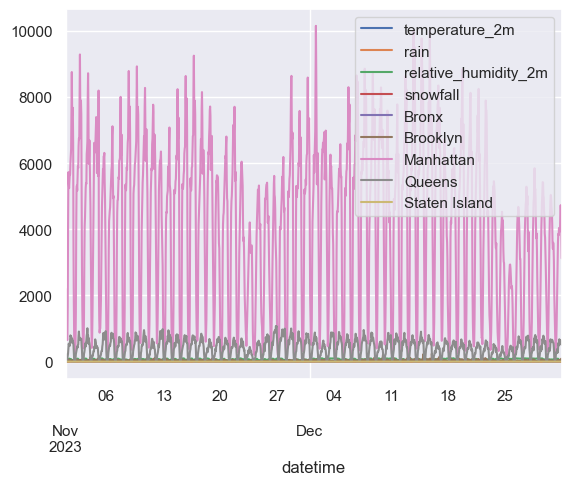

In [12]:
df.plot()

Hagamos boxplots de todas las variables:

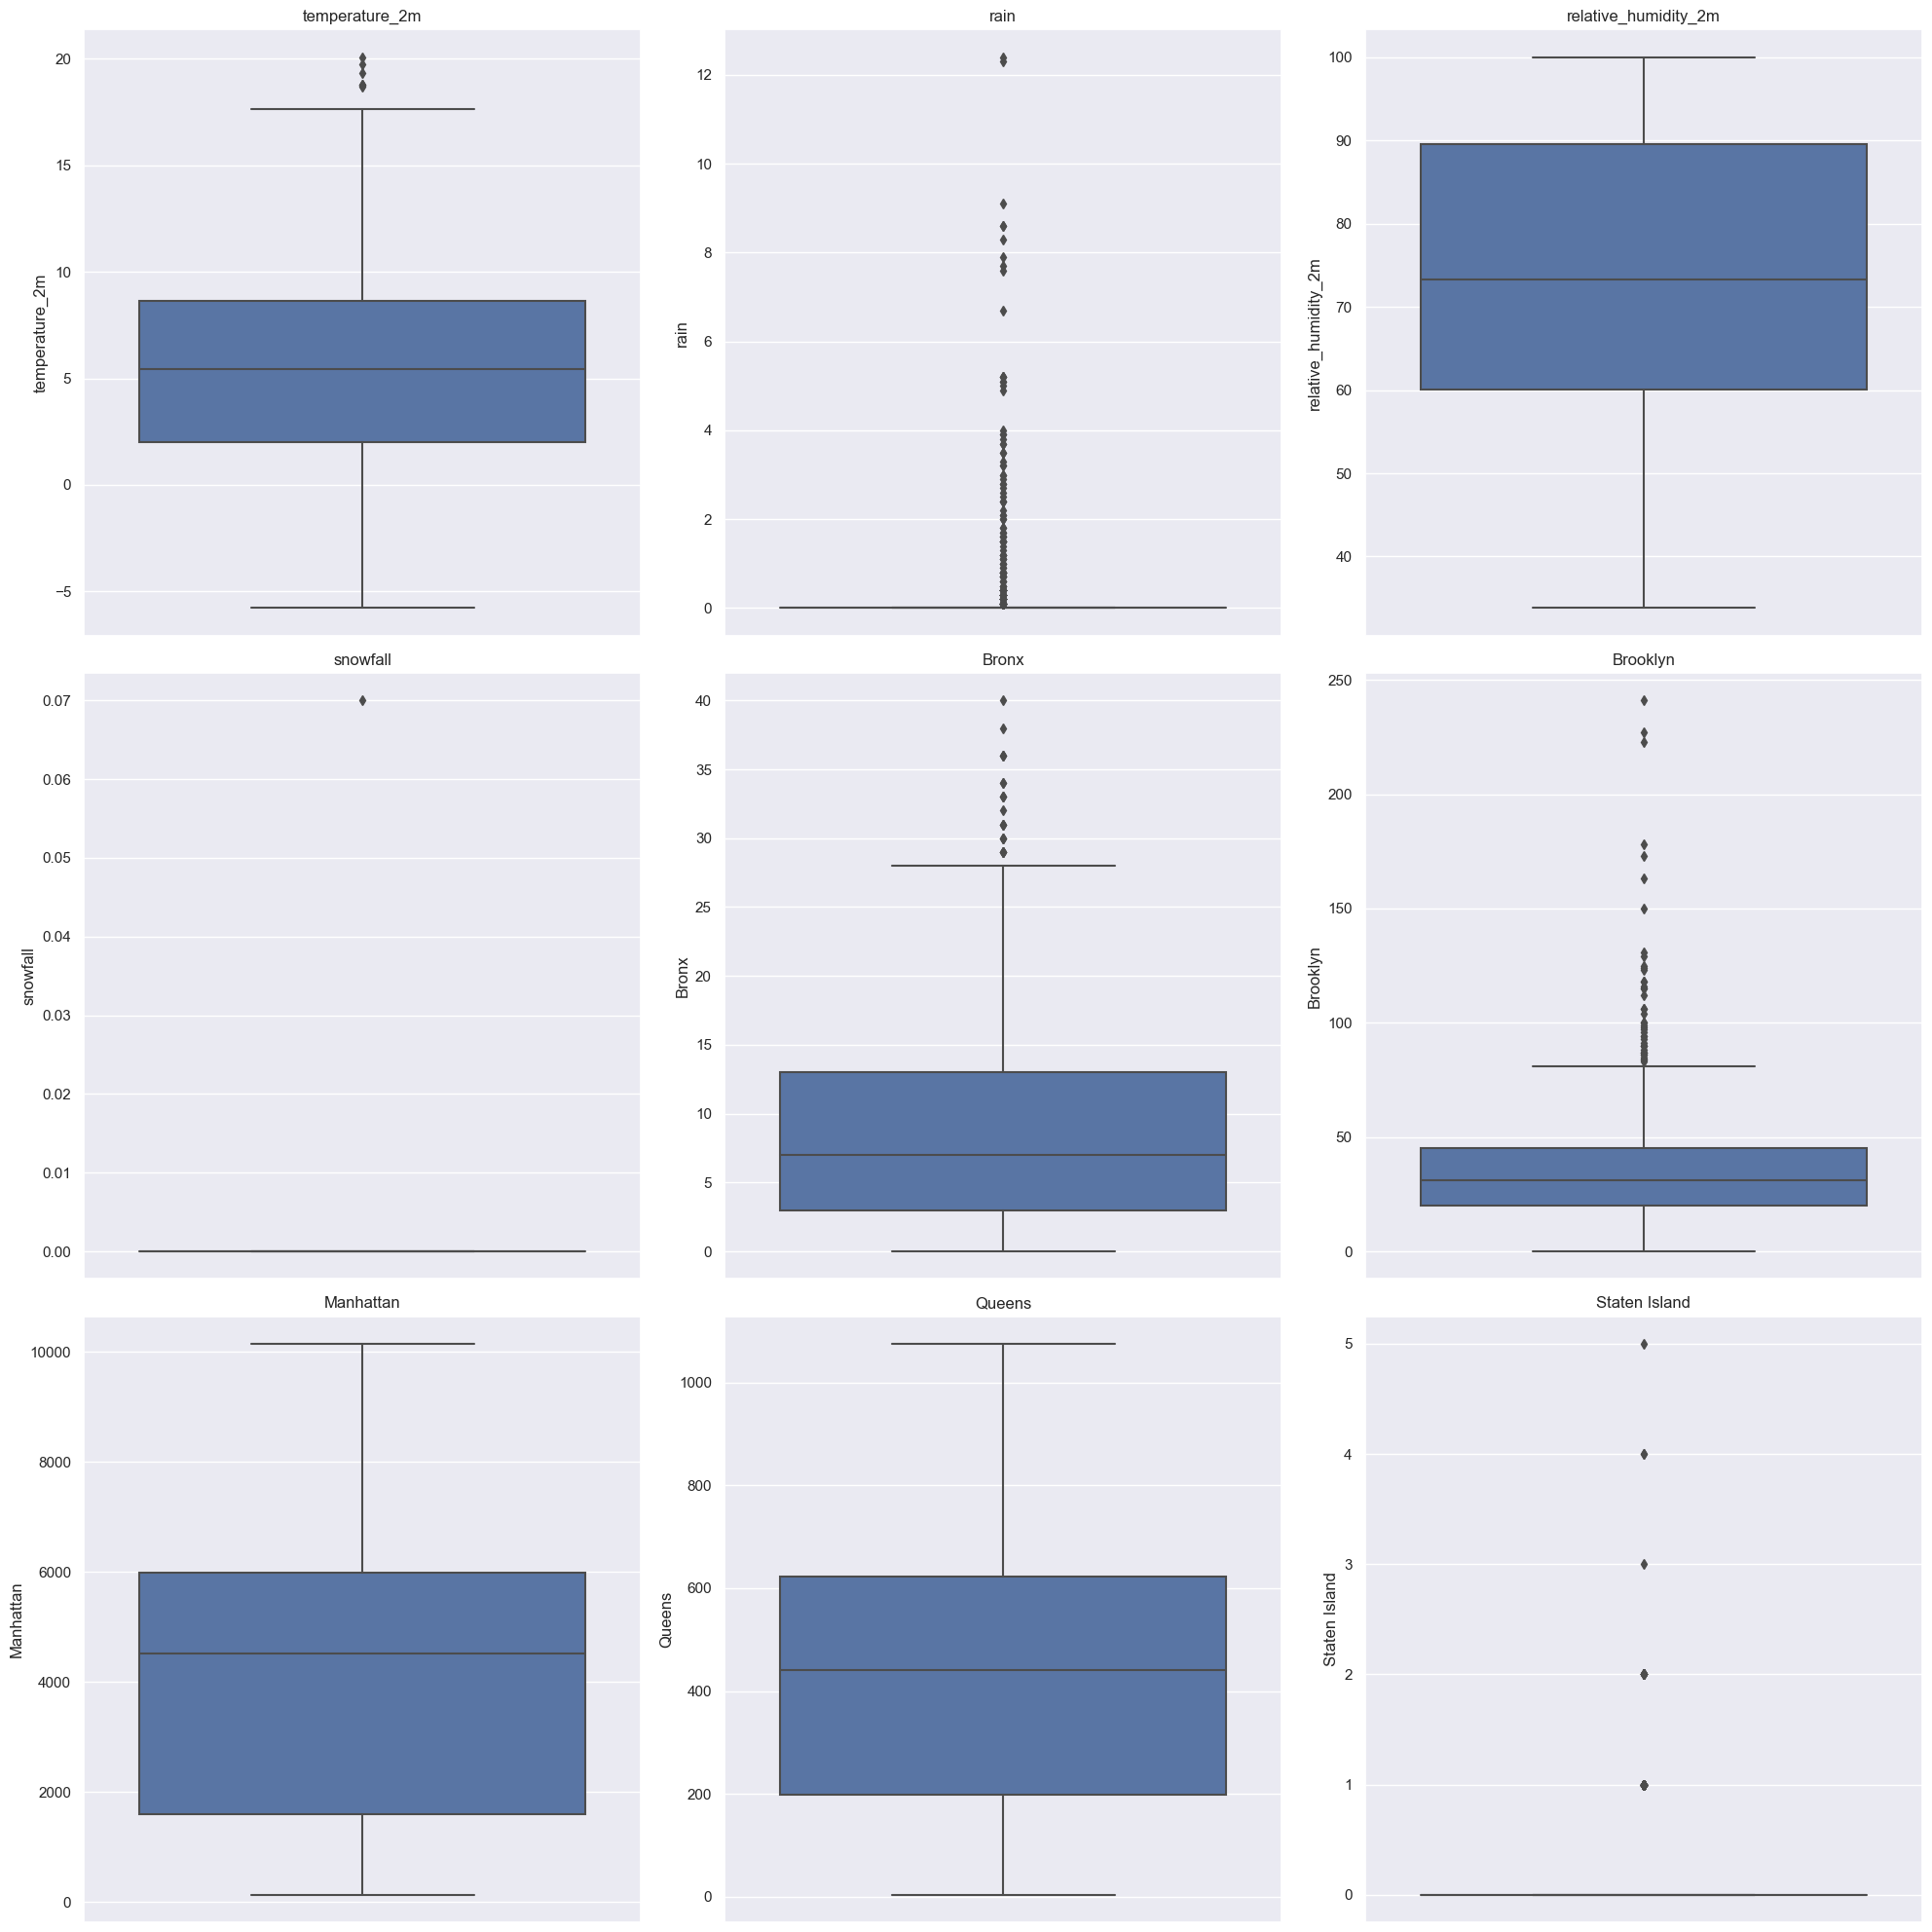

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for i, column in enumerate(df.columns):
    row = i //3
    col = i % 3
    sns.boxplot(data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)  

plt.tight_layout()
plt.show()

Ahora veamos la distribución de las variables:

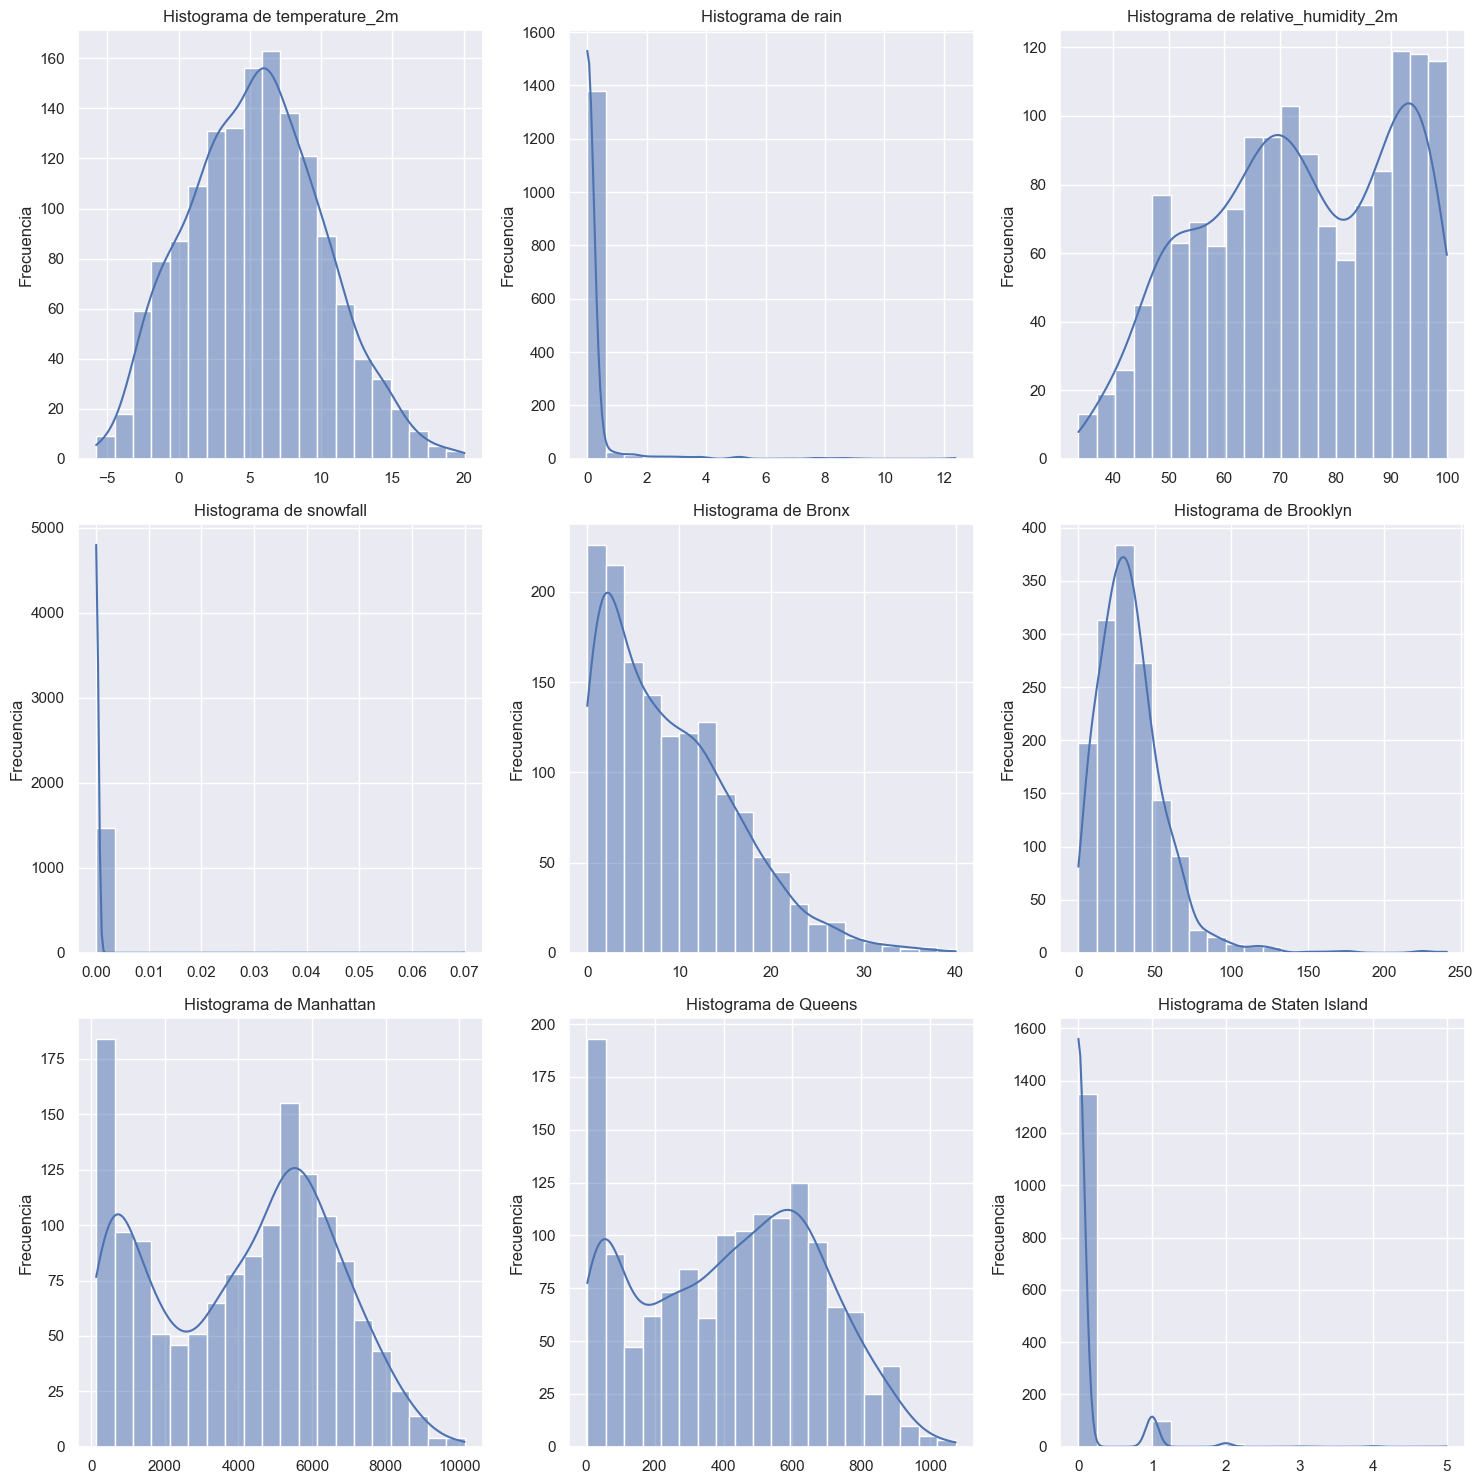

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Iterar sobre las columnas y graficar histogramas
for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, ax=axes[i], bins=20, kde=True)  # Ajusta el número de bins según tu preferencia
    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xlabel('')

# Ajustar el espaciado entre subgráficos y mostrar la figura
plt.tight_layout()
plt.show()

Veamos ahora la correlación entre variables

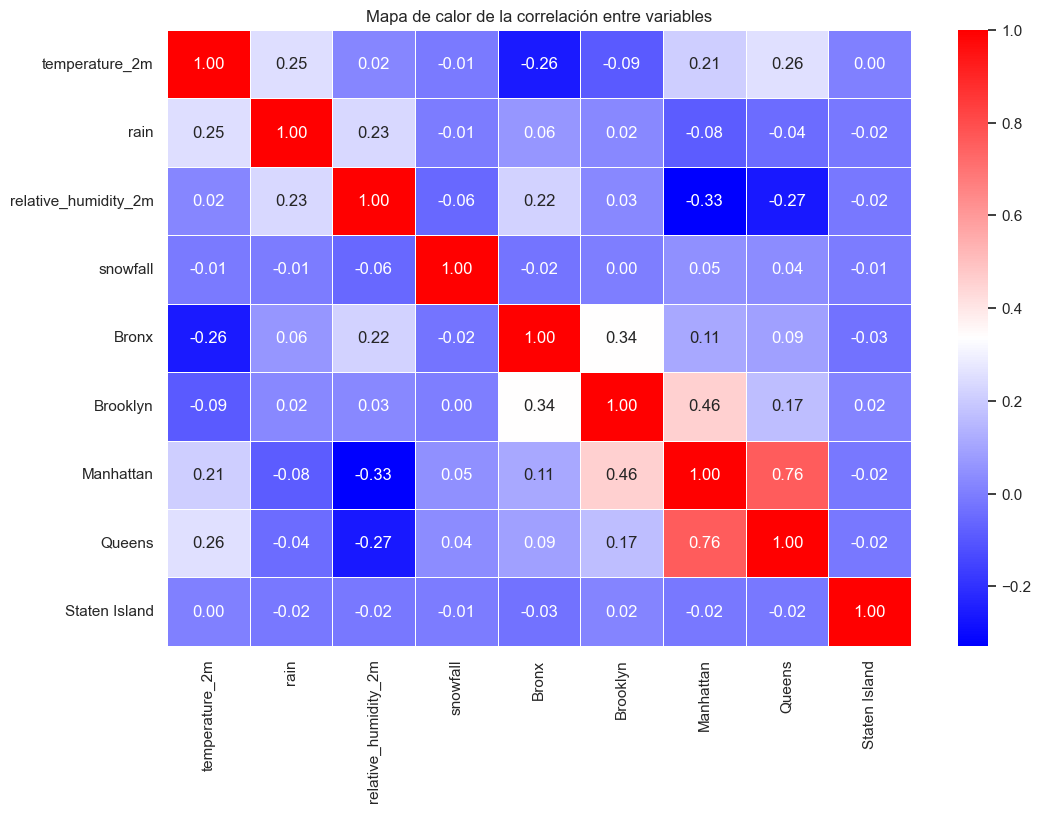

In [15]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de la correlación entre variables')
plt.show()


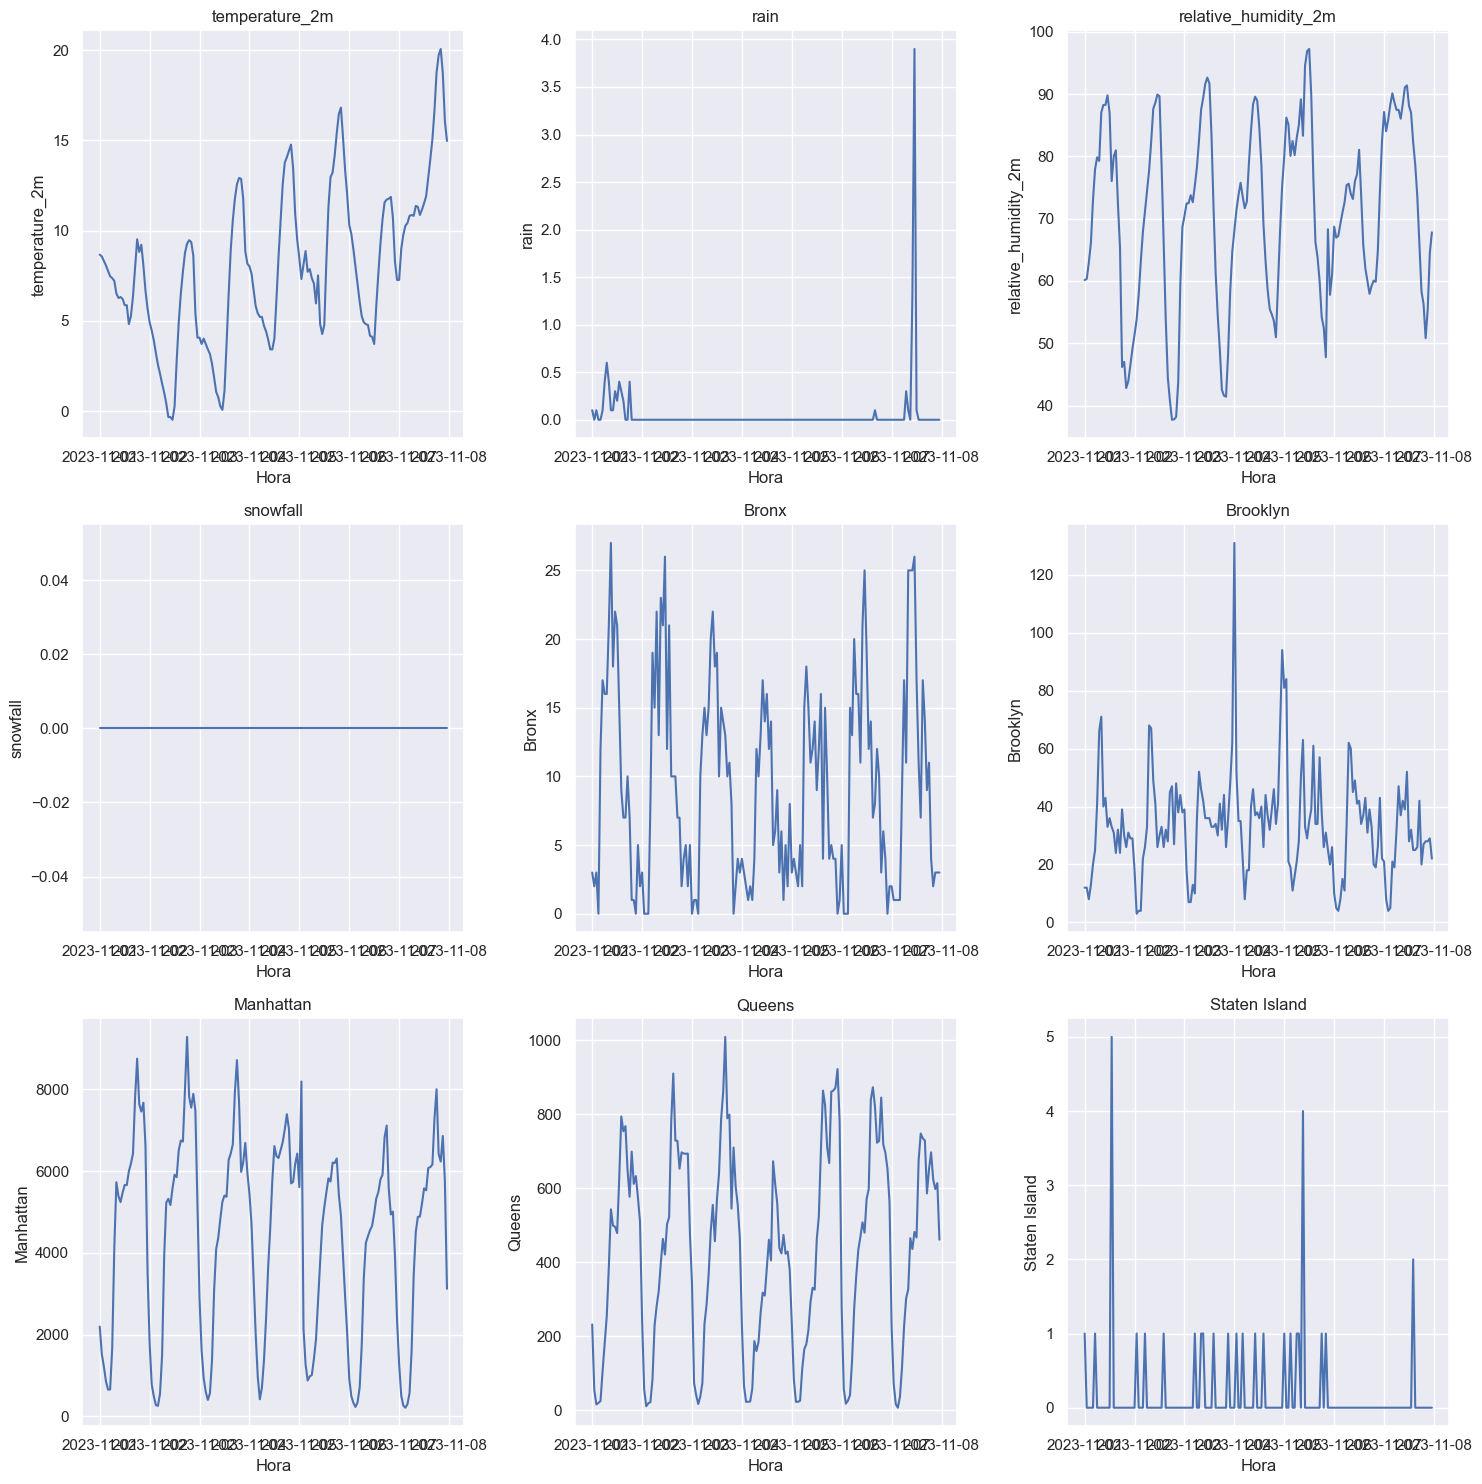

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
numero_dias = 7
horas = numero_dias*24
df_semana = df.iloc[:horas,:]
# Iterar sobre las columnas y graficar histogramas
for i, column in enumerate(df_semana.columns):
    sns.lineplot(data=df_semana, x=df_semana.index, y=column, ax=axes[i])  # Ajusta el número de bins según tu preferencia
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Hora')

# Ajustar el espaciado entre subgráficos y mostrar la figura
plt.tight_layout()
plt.show()

Comencemos ahora el analisis de la serie temporal:

In [17]:
def decompose_time_series(series, period):
    decomposition = sm.tsa.seasonal_decompose(series, period=period)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    return trend, seasonal, residual



Analicemos primero la demanda en Manhattan y variables climáticas:

In [18]:
# Aplica la descomposición a la serie temporal de demanda
manhattan_trend, manhattan_seasonal, manhattan_residual = decompose_time_series(df['Manhattan'], period=24)  
# Aplica la descomposición a las series temporales climáticas
temperature_trend, temperature_seasonal, temperature_residual = decompose_time_series(df['temperature_2m'], period=24) 
humidity_trend, humidity_seasonal, humidity_residual = decompose_time_series(df['relative_humidity_2m'], period=24)  
rain_trend, rain_seasonal, rain_residual = decompose_time_series(df['rain'], period=24)  
snow_trend, snow_seasonal, snow_residual = decompose_time_series(df['snowfall'], period=24)  


# Realiza la prueba de estacionariedad para la serie temporal de demanda
adf_test_manhattan = sm.tsa.stattools.adfuller(df['Manhattan'])
print("ADF Test para demanda de Manhattan:")
print("Estadística ADF:", adf_test_manhattan[0])
print("Valor p:", adf_test_manhattan[1])
print("Valores críticos:", adf_test_manhattan[4])
if adf_test_manhattan[1] <= 0.05:
    print("La serie temporal de demanda en Mabhattan es estacionaria (p <= 0.05)")
else:
    print("La serie temporal de demanda en Manhattan no es estacionaria (p > 0.05)")

print('-----------------------------------------------------------')

adf_test_bronx = sm.tsa.stattools.adfuller(df['Bronx'])
print("ADF Test para demanda de Bronx:")
print("Estadística ADF:", adf_test_bronx[0])
print("Valor p:", adf_test_bronx[1])
print("Valores críticos:", adf_test_bronx[4])
if adf_test_bronx[1] <= 0.05:
    print("La serie temporal de demanda en Bronx es estacionaria (p <= 0.05)")
else:
    print("La serie temporal de demanda en Bronx no es estacionaria (p > 0.05)")

print('-----------------------------------------------------------')

adf_test_brooklyn = sm.tsa.stattools.adfuller(df['Brooklyn'])
print("ADF Test para demanda de Brooklyn:")
print("Estadística ADF:", adf_test_brooklyn[0])
print("Valor p:", adf_test_brooklyn[1])
print("Valores críticos:", adf_test_brooklyn[4])
if adf_test_brooklyn[1] <= 0.05:
    print("La serie temporal de demanda en Brooklyn es estacionaria (p <= 0.05)")
else:
    print("La serie temporal de demanda en Brooklyn no es estacionaria (p > 0.05)")

print('-----------------------------------------------------------')

adf_test_queens = sm.tsa.stattools.adfuller(df['Queens'])
print("ADF Test para demanda de Queens:")
print("Estadística ADF:", adf_test_queens[0])
print("Valor p:", adf_test_queens[1])
print("Valores críticos:", adf_test_queens[4])
if adf_test_queens[1] <= 0.05:
    print("La serie temporal de demanda en Queens es estacionaria (p <= 0.05)")
else:
    print("La serie temporal de demanda en Queens no es estacionaria (p > 0.05)")

print('-----------------------------------------------------------')

adf_test_sti = sm.tsa.stattools.adfuller(df['Staten Island'])
print("ADF Test para demanda de Staten Island:")
print("Estadística ADF:", adf_test_sti[0])
print("Valor p:", adf_test_sti[1])
print("Valores críticos:", adf_test_sti[4])
if adf_test_sti[1] <= 0.05:
    print("La serie temporal de demanda en Staten Island es estacionaria (p <= 0.05)")
else:
    print("La serie temporal de demanda en Staten Island no es estacionaria (p > 0.05)")

print('-----------------------------------------------------------')

# Realiza la prueba de estacionariedad para la serie temporal climática
adf_test_temperature = sm.tsa.stattools.adfuller(df['temperature_2m'])
print("\nADF Test para temperatura:")
print("Estadística ADF:", adf_test_temperature[0])
print("Valor p:", adf_test_temperature[1])
print("Valores críticos:", adf_test_temperature[4])
if adf_test_temperature[1] <= 0.05:
    print("La serie temporal de temperatura es estacionaria (p <= 0.05)")
else:
    print("La serie temporal de temperatura no es estacionaria (p > 0.05)")

print('-----------------------------------------------------------')

# Realiza la prueba de estacionariedad para la serie temporal climática
adf_test_humidity = sm.tsa.stattools.adfuller(df['relative_humidity_2m'])
print("\nADF Test para humedad:")
print("Estadística ADF:", adf_test_humidity[0])
print("Valor p:", adf_test_humidity[1])
print("Valores críticos:", adf_test_humidity[4])
if adf_test_humidity[1] <= 0.05:
    print("La serie temporal de humedad es estacionaria (p <= 0.05)")
else:
    print("La serie temporal de humedad no es estacionaria (p > 0.05)")

print('-----------------------------------------------------------')

adf_test_rain = sm.tsa.stattools.adfuller(df['rain'])
print("\nADF Test para humedad:")
print("Estadística ADF:", adf_test_rain[0])
print("Valor p:", adf_test_rain[1])
print("Valores críticos:", adf_test_rain[4])
if adf_test_rain[1] <= 0.05:
    print("La serie temporal de lluvia es estacionaria (p <= 0.05)")
else:
    print("La serie temporal de lluvia no es estacionaria (p > 0.05)")

print('-----------------------------------------------------------')

adf_test_snow = sm.tsa.stattools.adfuller(df['snowfall'])
print("\nADF Test para humedad:")
print("Estadística ADF:", adf_test_snow[0])
print("Valor p:", adf_test_snow[1])
print("Valores críticos:", adf_test_snow[4])
if adf_test_snow[1] <= 0.05:
    print("La serie temporal de nieve es estacionaria (p <= 0.05)")
else:
    print("La serie temporal de nieve no es estacionaria (p > 0.05)")

print('-----------------------------------------------------------')



ADF Test para demanda de Manhattan:
Estadística ADF: -2.7895221475033343
Valor p: 0.059786112095795464
Valores críticos: {'1%': -3.4349024693573584, '5%': -2.8635506057382325, '10%': -2.5678404322793846}
La serie temporal de demanda en Manhattan no es estacionaria (p > 0.05)
-----------------------------------------------------------
ADF Test para demanda de Bronx:
Estadística ADF: -4.270539015317261
Valor p: 0.0004993906315148772
Valores críticos: {'1%': -3.4349024693573584, '5%': -2.8635506057382325, '10%': -2.5678404322793846}
La serie temporal de demanda en Bronx es estacionaria (p <= 0.05)
-----------------------------------------------------------
ADF Test para demanda de Brooklyn:
Estadística ADF: -3.502478036014827
Valor p: 0.00792368045045395
Valores críticos: {'1%': -3.4349024693573584, '5%': -2.8635506057382325, '10%': -2.5678404322793846}
La serie temporal de demanda en Brooklyn es estacionaria (p <= 0.05)
-----------------------------------------------------------
ADF Test

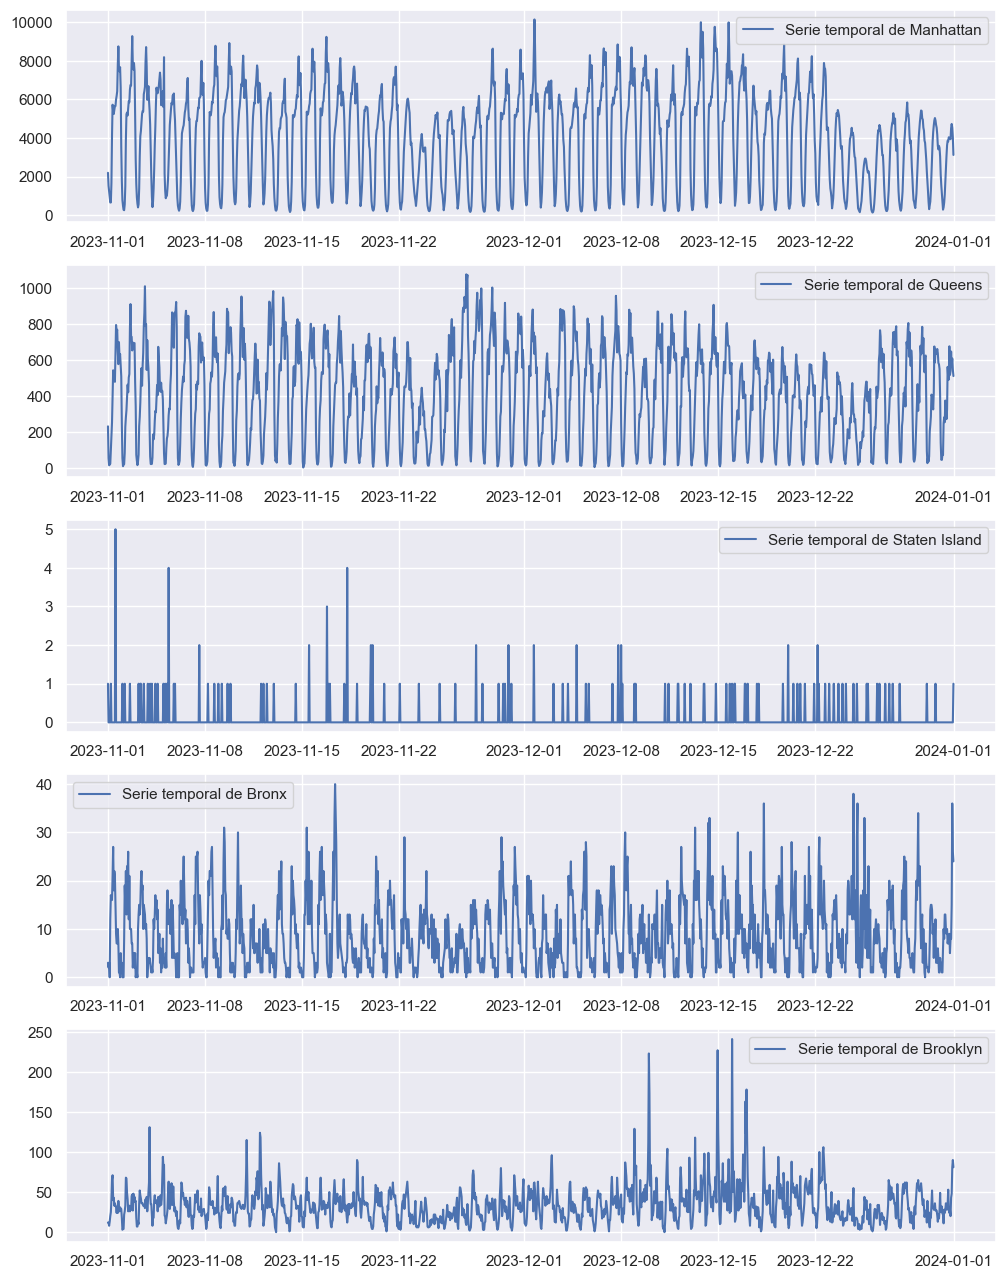

In [19]:
plt.figure(figsize=(12, 16))  
plt.subplot(511)
plt.plot(df['Manhattan'], label='Serie temporal de Manhattan')
plt.legend(loc='best')
plt.subplot(512)
plt.plot(df['Queens'], label='Serie temporal de Queens')
plt.legend(loc='best')
plt.subplot(513)
plt.plot(df['Staten Island'], label='Serie temporal de Staten Island')
plt.legend(loc='best')
plt.subplot(514)
plt.plot(df['Bronx'], label='Serie temporal de Bronx')
plt.legend(loc='best')
plt.subplot(515)
plt.plot(df['Brooklyn'], label='Serie temporal de Brooklyn')
plt.legend(loc='best')

Evaluemos un modelo ARIMA para Manhattan:

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
n = len(df['Manhattan'])
train_size = int(n * 0.8)  # 80% de los datos para entrenamiento

train_data = df['Manhattan'][:train_size]
test_data = df['Manhattan'][train_size:]

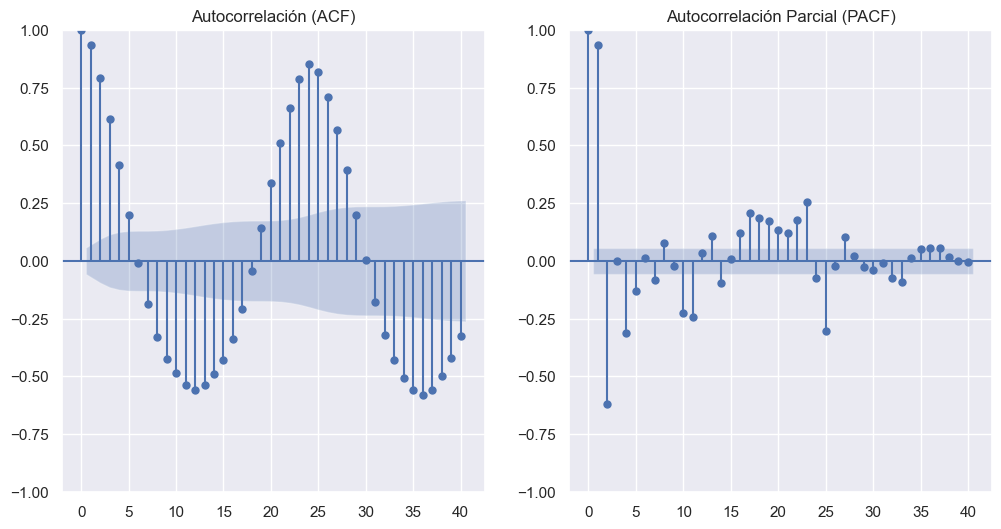

In [27]:
# Graficar ACF y PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(train_data, lags=40, ax=plt.gca(), title='Autocorrelación (ACF)')
plt.subplot(122)
plot_pacf(train_data, lags=40, ax=plt.gca(), title='Autocorrelación Parcial (PACF)')
plt.show()

Por lo que vemos en el gráfico ACF, el valor de q podría ser 5. <br>
Así mismo, pareciera ser el mejor valor de p igual a 5.

Tratemos de determinar los valores de p, d y q con criterios de información:

In [29]:
import pmdarima as pm

In [31]:
model = pm.auto_arima(train_data, seasonal=False, trace=True,
                      error_action='ignore', suppress_warnings=True,
                      stepwise=True, max_order=None, max_p=10, max_d=5, max_q=10)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=18709.169, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23270.297, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19266.926, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21782.588, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=18729.737, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=18720.438, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=18711.072, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=18710.875, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=18789.976, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=18731.726, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=18718.488, Time=0.22 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=18634.720, Time=1.11 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=18621.165, Time=1.18 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=18615.984, Time=1.19 sec
 ARIMA(4,0,1)(0,0,0

Veamos como es el modelo predice demanda:

In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
# Suponiendo que 'train' es tu conjunto de entrenamiento
model = ARIMA(train_data, order=(5,0,0))
fitted_model = model.fit()

# Realizar predicciones
predictions = fitted_model.get_forecast(steps=len(test_data))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

c:\Users\alter\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alter\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alter\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [39]:
# Crear un DataFrame con las predicciones y el intervalo de confianza
predictions_df = pd.DataFrame({'predicted_mean': predicted_mean})
predictions_df['lower_conf'] = conf_int.iloc[:, 0]
predictions_df['upper_conf'] = conf_int.iloc[:, 1]

# Añadir el índice del tiempo al DataFrame de predicciones si es necesario
predictions_df.index = test_data.index  

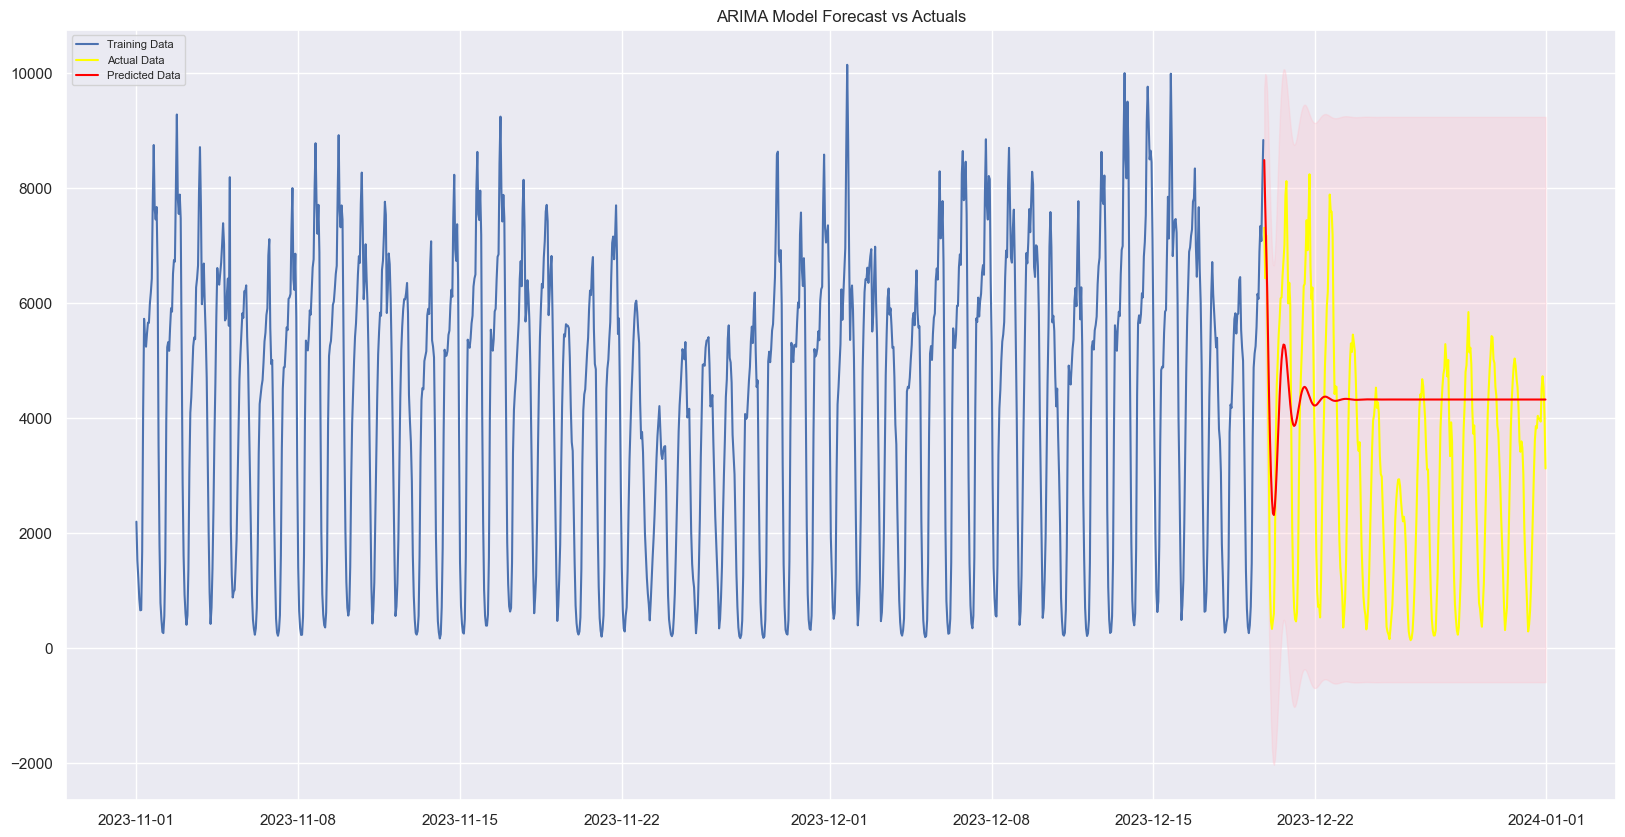

In [41]:
plt.figure(figsize=(20, 10))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Data', color='yellow')
plt.plot(predictions_df['predicted_mean'], label='Predicted Data', color='red')
plt.fill_between(predictions_df.index, predictions_df['lower_conf'], predictions_df['upper_conf'], color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Vemos que el modelo tiene una pobre predicción. Calculemos una métrica para saber cuán bien predice:

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
y_true = test_data.values  # valores reales
y_pred = predictions_df['predicted_mean']  # predicciones del modelo

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Implementación manual de sMAPE
smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, sMAPE: {smape}')

MAE: 1848.5146102443077, MSE: 5124921.595404358, RMSE: 2263.828967789828, MAPE: 244.43380753546796, sMAPE: 62.57206445091601


Hay mucho error en estas predicciones. Agreguemos una componente estacional (SARIMA)

In [47]:
model = pm.auto_arima(train_data, seasonal=True, m=24, trace=True,
                      error_action='ignore', suppress_warnings=True,
                      stepwise=True, max_order=None, max_p=10, max_d=5, max_q=10)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=18137.603, Time=11.92 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=21655.082, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=18258.875, Time=15.06 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=19577.074, Time=3.35 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=23270.297, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[24] intercept   : AIC=18329.347, Time=8.90 sec
 ARIMA(2,0,2)(1,0,0)[24] intercept   : AIC=18135.812, Time=46.64 sec
 ARIMA(2,0,2)(0,0,0)[24] intercept   : AIC=18631.239, Time=1.04 sec
 ARIMA(2,0,2)(2,0,0)[24] intercept   : AIC=18132.338, Time=218.47 sec
 ARIMA(2,0,2)(2,0,1)[24] intercept   : AIC=inf, Time=64.56 sec
 ARIMA(1,0,2)(2,0,0)[24] intercept   : AIC=18108.606, Time=539.56 sec
 ARIMA(1,0,2)(1,0,0)[24] intercept   : AIC=18117.027, Time=64.36 sec
 ARIMA(1,0,2)(2,0,1)[24] intercept   : AIC=inf, Time=51.75 sec
 ARIMA(1,0,2)(1,0,1)[24] intercept   : AIC=18103.295, Time=3.51 sec
 ARIMA(

Vemos que se agrega una componente de estacionalidad. <br>
Grafiquemos las predicciones:

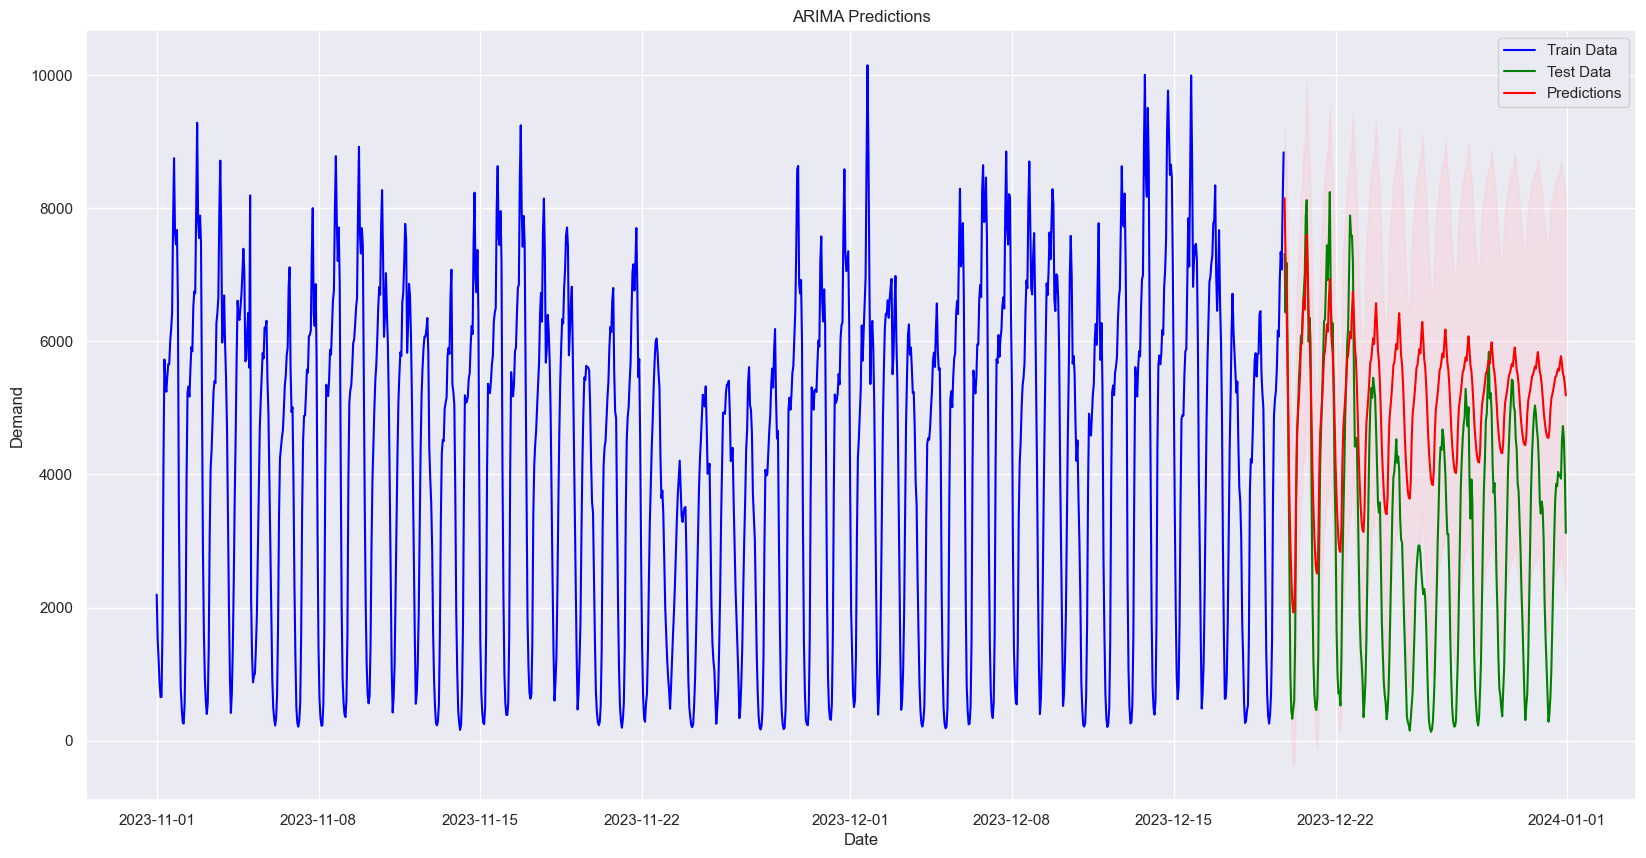

In [49]:
# Obtener las predicciones
predictions, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)

# Crear un DataFrame para almacenar las predicciones
predictions_df = pd.DataFrame(predictions, index=test_data.index, columns=['Prediction'])

# Agregar intervalos de confianza al DataFrame
predictions_df['lower_conf'] = conf_int[:, 0]
predictions_df['upper_conf'] = conf_int[:, 1]

# Graficar las predicciones junto con los datos reales
plt.figure(figsize=(20, 10))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='green')
plt.plot(predictions_df['Prediction'], label='Predictions', color='red')
plt.fill_between(predictions_df.index, predictions_df['lower_conf'], predictions_df['upper_conf'], color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()


Las predicciones mejoran bastante. Calculemos el error:

In [50]:
y_true = test_data.values  # valores reales
y_pred = predictions_df['Prediction']  # predicciones del modelo

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Implementación manual de sMAPE
smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, sMAPE: {smape}')

MAE: 2025.1580768995689, MSE: 5581346.201355038, RMSE: 2362.487291257889, MAPE: 237.7400529892714, sMAPE: 66.04268399756374


Agreguemos variables exógenas:

In [80]:
import holidays
df = pd.read_parquet('../data_export/prueba_ml.parquet')
df.reset_index(inplace=True, drop=True)
df['dia_semana'] = df['fecha'].dt.weekday + 1
year = 2023
us_holidays = holidays.US(years=year)
us_holidays
df['holiday'] = np.where(df['fecha'].isin(us_holidays), 1, 0)
df['rain'] = df['rain'].shift(1)
df['snowfall'] = df['snowfall'].shift(1)
df.fillna(0.0, inplace=True)
df['datetime'] = pd.to_datetime(df['fecha'].astype(str) + ' ' + df['hora'].astype(int).astype(str) + ':00:00')
df.head()

,fecha,hora,temperature_2m,rain,relative_humidity_2m,snowfall,Bronx,Brooklyn,Manhattan,Queens,Staten Island,año,mes,dia,dia_semana,holiday,datetime
0,2023-11-01,0.0,8.6725,0.0,60.153034,0.0,3,12,2196,232,1,2023,11,1,3,0,2023-11-01 00:00:00
1,2023-11-01,1.0,8.5725,0.1,60.344471,0.0,2,12,1521,55,0,2023,11,1,3,0,2023-11-01 01:00:00
2,2023-11-01,2.0,8.3225,0.0,62.933163,0.0,3,8,1214,16,0,2023,11,1,3,0,2023-11-01 02:00:00
3,2023-11-01,3.0,8.0725,0.1,66.100021,0.0,0,13,854,20,0,2023,11,1,3,0,2023-11-01 03:00:00
4,2023-11-01,4.0,7.7725,0.0,72.938622,0.0,12,20,654,25,0,2023,11,1,3,0,2023-11-01 04:00:00


Vamos a analizar nuevamente solo Manhattan

In [81]:
df.set_index('datetime', inplace=True)

In [82]:
variables_exogenas = ['temperature_2m', 'rain', 'relative_humidity_2m', 'snowfall', 'dia_semana', 'holiday' ]
variable_endogena = ['Manhattan']

In [83]:
df = df[variable_endogena + variables_exogenas]

In [84]:
n = len(df['Manhattan'])
train_size = int(n * 0.8)  # 80% de los datos para entrenamiento

endog_train_data = df[variable_endogena][:train_size]
endog_test_data = df[variable_endogena][train_size:]

exog_train_data = df[variables_exogenas][:train_size]
exog_test_data = df[variables_exogenas][train_size:]

In [60]:
model = pm.auto_arima(endog_train_data, exogenous=exog_train_data, seasonal=True, m=24)

# Obtener los órdenes del modelo SARIMA
order = model.order
seasonal_order = model.seasonal_order

print("Order:", order)
print("Seasonal order:", seasonal_order)

Order: (1, 0, 2)
Seasonal order: (1, 0, 2, 24)


In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [85]:
# Ajustar el modelo SARIMA
model = SARIMAX(endog_train_data, exog=exog_train_data, order=(1, 0, 2), seasonal_order=(1, 0, 2, 24))
fit_model = model.fit()

# Realizar predicciones
forecast = fit_model.get_forecast(steps=len(test_data), exog=exog_test_data)
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()



c:\Users\alter\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\alter\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [86]:
# Crear un DataFrame de las predicciones
predictions_df = pd.DataFrame({
    #'Date': test_data.index,  # Suponiendo que tienes un índice de fechas en tus datos de prueba
    'Predicted': predicted_values,
    'Lower Confidence Interval': confidence_intervals.iloc[:, 0],
    'Upper Confidence Interval': confidence_intervals.iloc[:, 1]
})


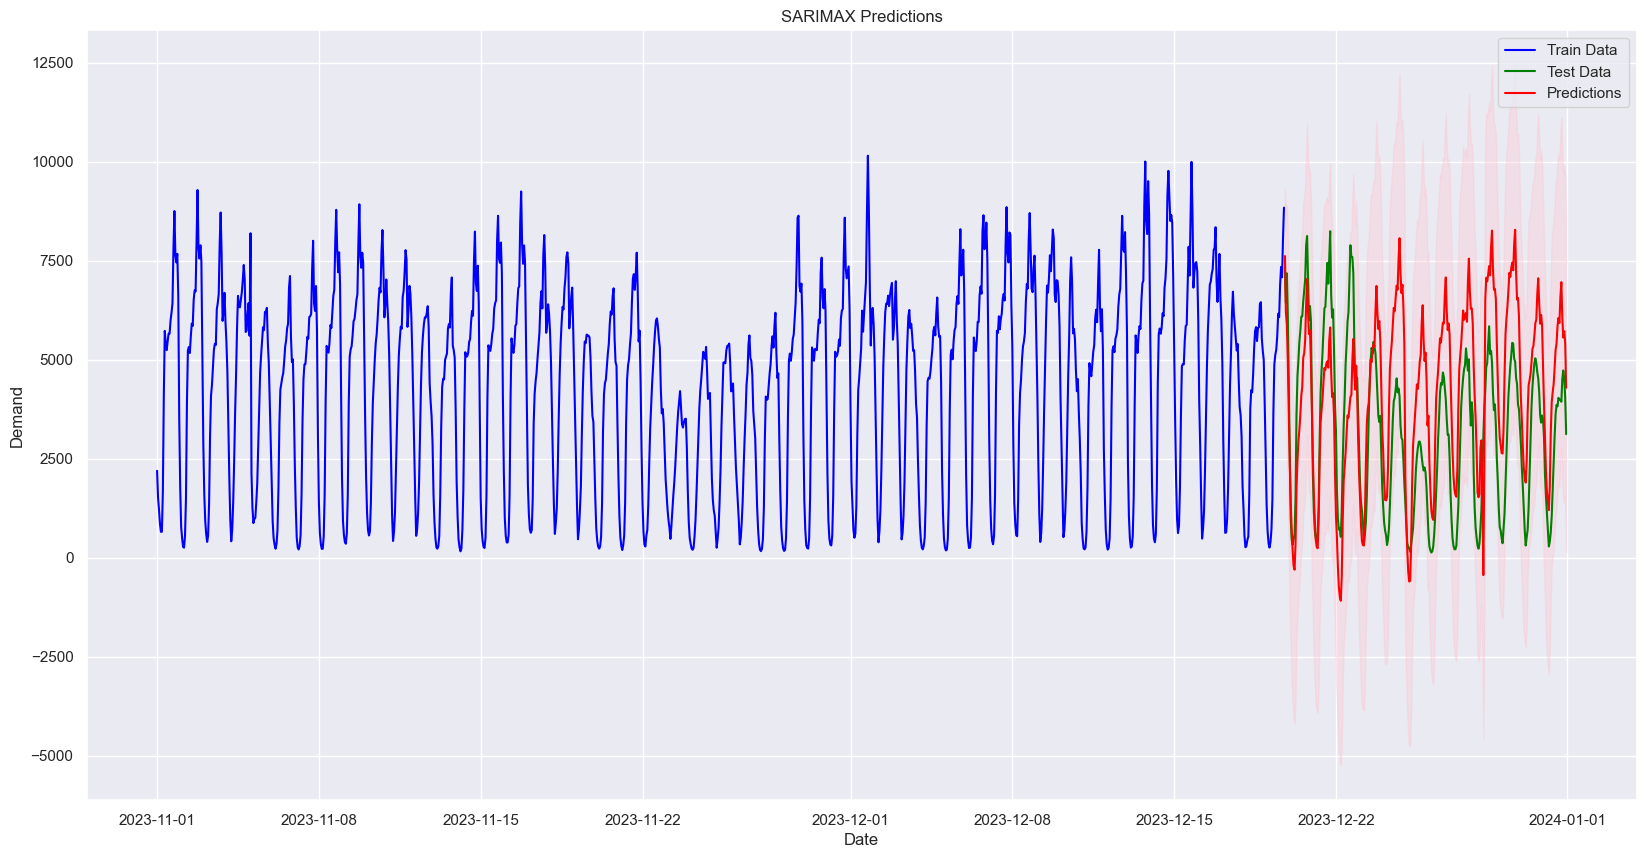

In [89]:
# Graficar las predicciones junto con los datos reales
plt.figure(figsize=(20, 10))
plt.plot(endog_train_data, label='Train Data', color='blue')
plt.plot(endog_test_data, label='Test Data', color='green')
plt.plot(predictions_df['Predicted'], label='Predictions', color='red')
plt.fill_between(predictions_df.index, predictions_df['Lower Confidence Interval'], predictions_df['Upper Confidence Interval'], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMAX Predictions')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

In [93]:
y_true = endog_test_data.values  # valores reales
y_pred = predictions_df['Predicted'].values  # predicciones del modelo

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Implementación manual de sMAPE
smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, sMAPE: {smape}')

MAE: 1762.860228741542, MSE: 3990894.041237408, RMSE: 1997.7222132312108, MAPE: 266.3059932923392, sMAPE: 24054.84233472224


Vemos que el agregado de variables exógenas mejora el modelo muchísimo.